<a href="https://colab.research.google.com/github/PiyumiHerath/ASSEMBLY-codes/blob/master/userBehaviorIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the 3 csv files need for training

In [ ]:
from google.colab import files
uploaded = files.upload()  #listening.csv, reverse_tap.csv, and reverse_translate.csv


Saving listening.csv to listening.csv
Saving reverse_tap.csv to reverse_tap.csv
Saving reverse_translate.csv to reverse_translate.csv


Exploratory Data Analysis.

How much time learners typically spend on each task.

Listening Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858017 entries, 0 to 858016
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User ID              858017 non-null  object 
 1   Country              858017 non-null  object 
 2   Days                 858017 non-null  float64
 3   Client               858017 non-null  object 
 4   Session              858017 non-null  object 
 5   Format               858017 non-null  object 
 6   Time                 820524 non-null  float64
 7   Token ID             858017 non-null  object 
 8   Token                858017 non-null  object 
 9   POS                  858017 non-null  object 
 10  Features             858017 non-null  object 
 11  Dependency Relation  858017 non-null  object 
 12  Head                 858017 non-null  int64  
 13  SpaceAfter           858017 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 91

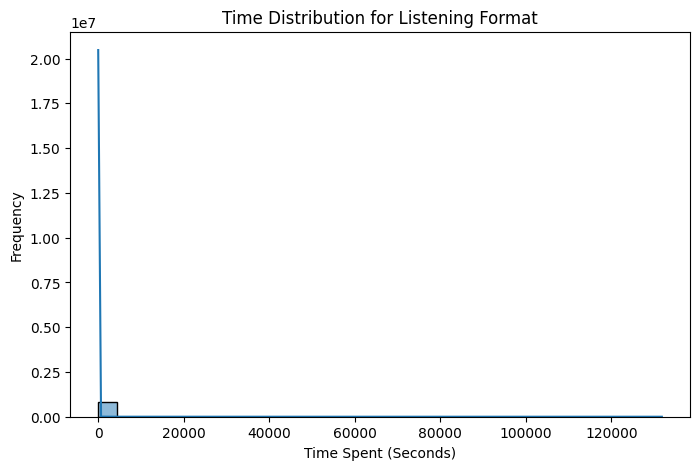

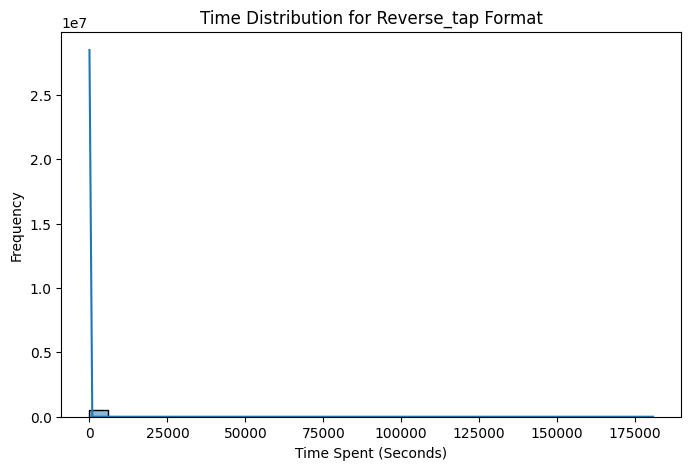

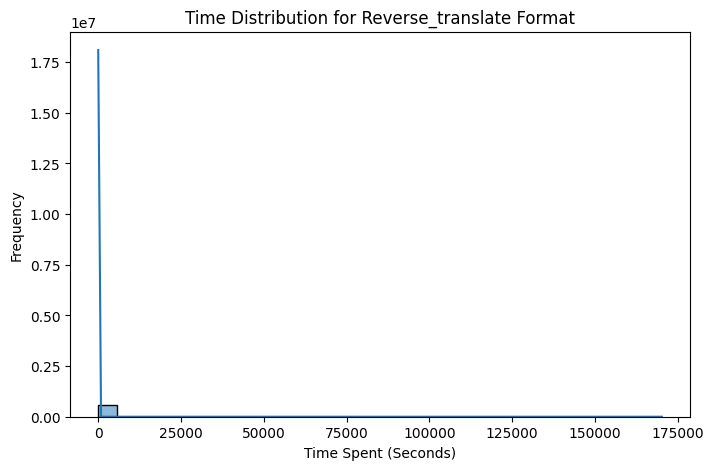

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load uploaded files into DataFrames
listening_df = pd.read_csv('listening.csv')
reverse_tap_df = pd.read_csv('reverse_tap.csv')
reverse_translate_df = pd.read_csv('reverse_translate.csv')

# Display basic info and statistics for each dataset
print("Listening Data:")
print(listening_df.info())
print(listening_df.describe())
print("\nReverse Tap Data:")
print(reverse_tap_df.info())
print(reverse_tap_df.describe())
print("\nReverse Translate Data:")
print(reverse_translate_df.info())
print(reverse_translate_df.describe())

# Analyze and visualize the average time spent per format
formats = ['listening', 'reverse_tap', 'reverse_translate']
dataframes = [listening_df, reverse_tap_df, reverse_translate_df]

time_data = {fmt: df['Time'].astype(float).mean() for fmt, df in zip(formats, dataframes)}
print("Average Time Spent per Format:")
print(time_data)

# Visualize time distribution
for fmt, df in zip(formats, dataframes):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Time'].astype(float), bins=30, kde=True)
    plt.title(f"Time Distribution for {fmt.capitalize()} Format")
    plt.xlabel('Time Spent (Seconds)')
    plt.ylabel('Frequency')
    plt.show()


Investigating Time Values, as above doesn't seem to correctly analyse the data.

In [ ]:
# Check basic statistics of the time column
for df, name in zip([listening_df, reverse_tap_df, reverse_translate_df], ['Listening', 'Reverse Tap', 'Reverse Translate']):
    print(f"\n{name} Time Statistics:")
    print(df['Time'].describe())
    print(f"Missing Values: {df['Time'].isnull().sum()}")
    print(f"Unique Values: {df['Time'].unique()[:10]}")  # Check first 10 unique values



Listening Time Statistics:
count    820524.000000
mean         37.695146
std        1029.039903
min           0.000000
25%           7.000000
50%          11.000000
75%          17.000000
max      131819.000000
Name: Time, dtype: float64
Missing Values: 37493
Unique Values: [ 9.  8. 10. 13. 21.  6.  5.  7. 20. 23.]

Reverse Tap Time Statistics:
count    506187.000000
mean         14.623319
std         571.411270
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max      180797.000000
Name: Time, dtype: float64
Missing Values: 33867
Unique Values: [ 4.  9.  5. 15.  3. 10.  2. 11.  6.  8.]

Reverse Translate Time Statistics:
count    556024.000000
mean         38.386158
std         927.560353
min           0.000000
25%           9.000000
50%          14.000000
75%          22.000000
max      170200.000000
Name: Time, dtype: float64
Missing Values: 19461
Unique Values: [ 8. 11.  9. 12.  6. 10. 15.  7. 21. 44.]


In [ ]:
# Impute missing values with the median
for df in [listening_df, reverse_tap_df, reverse_translate_df]:
    median_time = df['Time'].median()
    df['Time'].fillna(median_time, inplace=True)


<ipython-input-4-6384bd18e573>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].fillna(median_time, inplace=True)


In [ ]:
# Check if missing values are handled correctly
for df, name in zip([listening_df, reverse_tap_df, reverse_translate_df], ['Listening', 'Reverse Tap', 'Reverse Translate']):
    print(f"\n{name} Missing Values After Imputation: {df['Time'].isnull().sum()}")



Listening Missing Values After Imputation: 0

Reverse Tap Missing Values After Imputation: 0

Reverse Translate Missing Values After Imputation: 0


In [ ]:
# Remove outliers (e.g., Time > 300 seconds)
for df in [listening_df, reverse_tap_df, reverse_translate_df]:
    df = df[df['Time'] < 300]  # Keep only rows where Time < 300 seconds


In [ ]:
# Rechecking statistics after outlier removal
for df, name in zip([listening_df, reverse_tap_df, reverse_translate_df], ['Listening', 'Reverse Tap', 'Reverse Translate']):
    print(f"\n{name} Time Statistics (Cleaned):")
    print(df['Time'].describe())



Listening Time Statistics (Cleaned):
count    858017.000000
mean         36.528641
std        1006.320426
min           0.000000
25%           7.000000
50%          11.000000
75%          17.000000
max      131819.000000
Name: Time, dtype: float64

Reverse Tap Time Statistics (Cleaned):
count    540054.000000
mean         14.082547
std         553.208413
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max      180797.000000
Name: Time, dtype: float64

Reverse Translate Time Statistics (Cleaned):
count    575485.000000
mean         37.561499
std         911.752587
min           0.000000
25%           9.000000
50%          14.000000
75%          21.000000
max      170200.000000
Name: Time, dtype: float64


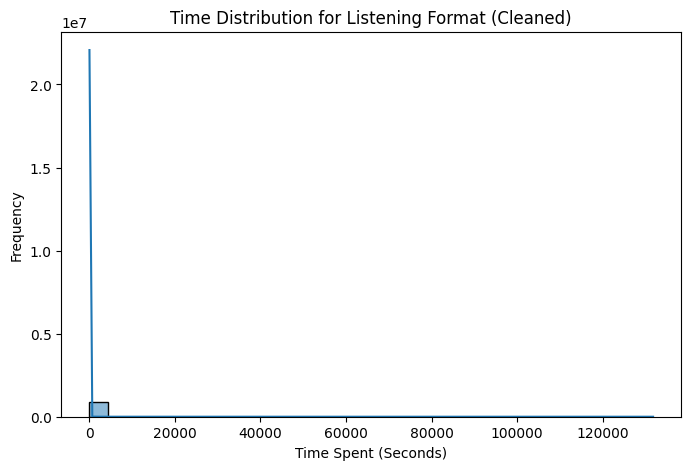

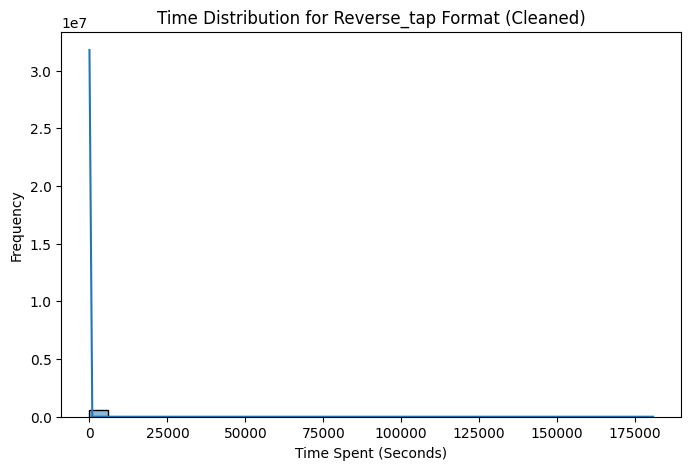

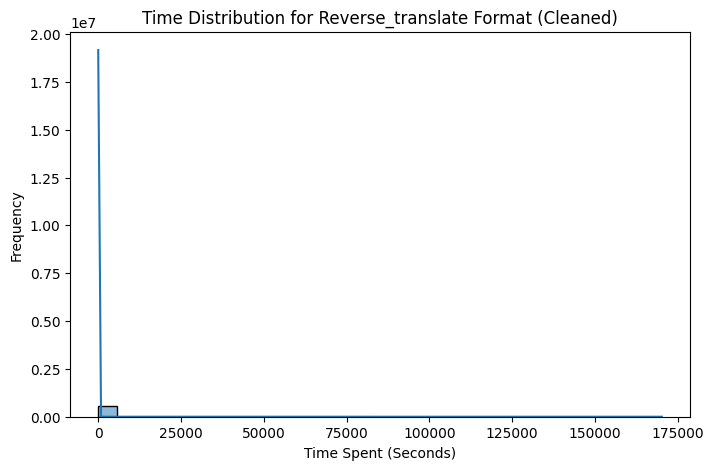

In [ ]:
# Visualize time distribution after cleaning
formats = ['listening', 'reverse_tap', 'reverse_translate']
dataframes = [listening_df, reverse_tap_df, reverse_translate_df]

for fmt, df in zip(formats, dataframes):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Time'], bins=30, kde=True)
    plt.title(f"Time Distribution for {fmt.capitalize()} Format (Cleaned)")
    plt.xlabel('Time Spent (Seconds)')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# Remove outliers (e.g., Time > 300 seconds)
listening_df = listening_df[listening_df['Time'] < 300]
reverse_tap_df = reverse_tap_df[reverse_tap_df['Time'] < 300]
reverse_translate_df = reverse_translate_df[reverse_translate_df['Time'] < 300]


In [ ]:
# Check statistics after cleaning
for df, name in zip([listening_df, reverse_tap_df, reverse_translate_df], ['Listening', 'Reverse Tap', 'Reverse Translate']):
    print(f"\n{name} Time Statistics (After Outlier Removal):")
    print(df['Time'].describe())




Listening Time Statistics (After Outlier Removal):
count    855226.000000
mean         14.337671
std          14.469343
min           0.000000
25%           7.000000
50%          11.000000
75%          17.000000
max         299.000000
Name: Time, dtype: float64

Reverse Tap Time Statistics (After Outlier Removal):
count    539386.000000
mean          7.926122
std          10.144597
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max         296.000000
Name: Time, dtype: float64

Reverse Translate Time Statistics (After Outlier Removal):
count    573884.000000
mean         17.813208
std          15.999081
min           0.000000
25%           9.000000
50%          14.000000
75%          21.000000
max         299.000000
Name: Time, dtype: float64


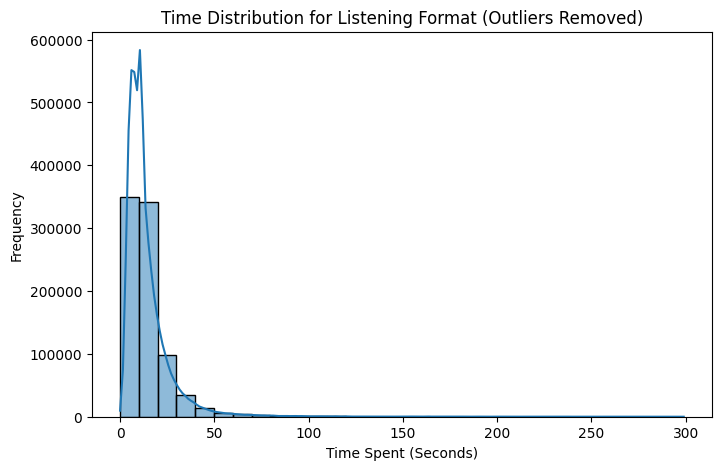

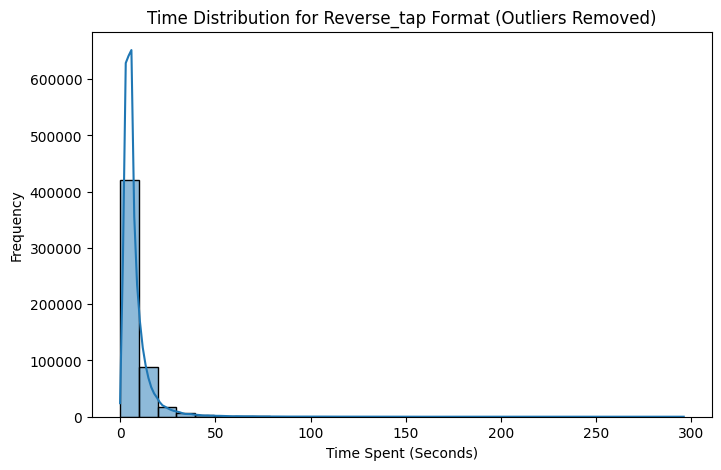

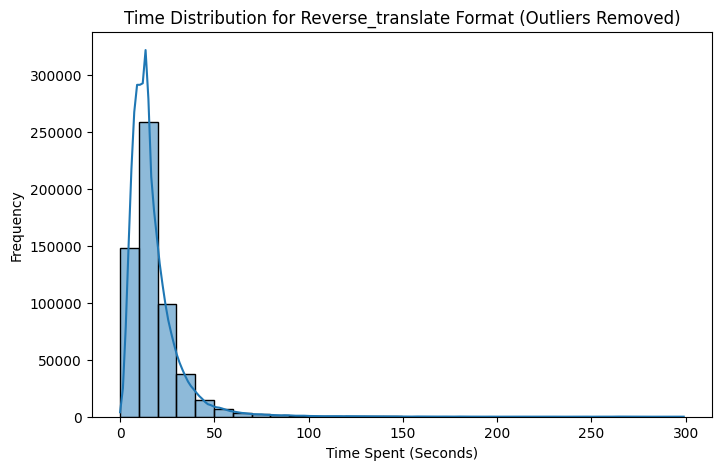

In [ ]:
# Visualize time distribution after removing outliers
for fmt, df in zip(['listening', 'reverse_tap', 'reverse_translate'], [listening_df, reverse_tap_df, reverse_translate_df]):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Time'], bins=30, kde=True)
    plt.title(f"Time Distribution for {fmt.capitalize()} Format (Outliers Removed)")
    plt.xlabel('Time Spent (Seconds)')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# Aggregate learner-level metrics
def aggregate_metrics(df, format_name):
    learner_df = df.groupby('User ID').agg({
        'Time': ['mean', 'sum', 'count'],  # Mean, total, and number of tasks
        'POS': 'nunique',                 # Unique POS tags encountered
    }).reset_index()
    learner_df.columns = ['User ID', f'{format_name}_mean_time', f'{format_name}_total_time',
                          f'{format_name}_task_count', f'{format_name}_unique_pos']
    return learner_df

# Apply aggregation to each format
listening_metrics = aggregate_metrics(listening_df, 'listening')
reverse_tap_metrics = aggregate_metrics(reverse_tap_df, 'reverse_tap')
reverse_translate_metrics = aggregate_metrics(reverse_translate_df, 'reverse_translate')

# Merge data for clustering
learner_data = listening_metrics.merge(reverse_tap_metrics, on='User ID', how='outer') \
                                .merge(reverse_translate_metrics, on='User ID', how='outer')
learner_data.fillna(0, inplace=True)  # Fill missing values with 0


In [ ]:
# Inspect the first few rows of the learner_data
print(learner_data.head())

# Check the data types and ensure all features are numeric
print(learner_data.info())

# Check summary statistics to verify the ranges of the features
print(learner_data.describe())


    User ID  listening_mean_time  listening_total_time  listening_task_count  \
0    #NAME?            15.124521              150005.0                9918.0   
1  +1eKjQkd             5.000000                  10.0                   2.0   
2  +24bHaLs            11.744361                1562.0                 133.0   
3  +8iRW0d/            12.620569               21720.0                1721.0   
4  +YkA7Up+            12.921502                3786.0                 293.0   

   listening_unique_pos  reverse_tap_mean_time  reverse_tap_total_time  \
0                  12.0               7.661604                 55991.0   
1                   2.0               0.000000                     0.0   
2                   9.0               7.804688                   999.0   
3                  12.0              12.153198                 24513.0   
4                   9.0               4.735484                   734.0   

   reverse_tap_task_count  reverse_tap_unique_pos  \
0                  73

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop the 'User ID' column and prepare features
features = learner_data.drop(columns=['User ID'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Features have been standardized for clustering.")


Features have been standardized for clustering.


**Using K means Clustering to cluster user behavior**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

feature_cols = [
    'listening_mean_time',
    'listening_total_time',
    'listening_task_count',
    'listening_unique_pos',
    'reverse_tap_mean_time',
    'reverse_tap_total_time',
    'reverse_tap_task_count',
    'reverse_tap_unique_pos',
    'reverse_translate_mean_time',
    'reverse_translate_total_time',
    'reverse_translate_task_count',
    'reverse_translate_unique_pos'
]

# Scale the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(learner_data[feature_cols])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
learner_data['Cluster'] = kmeans.fit_predict(scaled_features)

print(learner_data['Cluster'].value_counts())



Cluster
0    2151
1     454
2       1
Name: count, dtype: int64


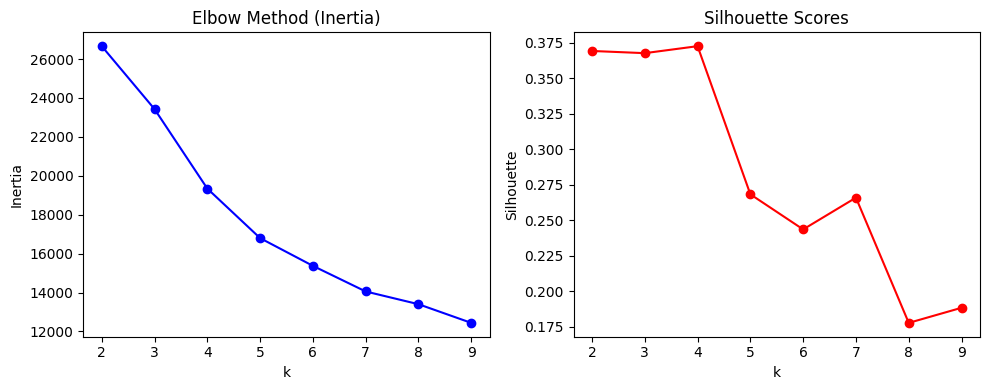

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
K_range = range(2, 10)  # Try k=2 to k=9

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_features)

    # Inertia (within-cluster sum of squares)
    inertias.append(km.inertia_)

    # Silhouette score
    sil = silhouette_score(scaled_features, labels)
    sil_scores.append(sil)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, 'ro-')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()


In [ ]:
# Filter the outlier cluster
outlier_data = learner_data[learner_data['Cluster'] == 2]  # or whichever cluster is the outlier
print(outlier_data)

  User ID  listening_mean_time  listening_total_time  listening_task_count  \
0  #NAME?            15.124521              150005.0                9918.0   

   listening_unique_pos  reverse_tap_mean_time  reverse_tap_total_time  \
0                  12.0               7.661604                 55991.0   

   reverse_tap_task_count  reverse_tap_unique_pos  \
0                  7308.0                    12.0   

   reverse_translate_mean_time  reverse_translate_total_time  \
0                    16.967524                      105538.0   

   reverse_translate_task_count  reverse_translate_unique_pos  Cluster  
0                        6220.0                          13.0        2  


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Re-run K-Means with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
learner_data['Cluster_2'] = kmeans_2.fit_predict(scaled_features)

# Check cluster distribution
print(learner_data['Cluster_2'].value_counts())


Cluster_2
0    2116
1     490
Name: count, dtype: int64


In [ ]:
import numpy as np

cluster_summary = learner_data.groupby('Cluster_2')[
    [
        'listening_mean_time', 'listening_total_time',
        'listening_task_count', 'listening_unique_pos',
        'reverse_tap_mean_time', 'reverse_tap_total_time',
        'reverse_tap_task_count', 'reverse_tap_unique_pos',
        'reverse_translate_mean_time', 'reverse_translate_total_time',
        'reverse_translate_task_count', 'reverse_translate_unique_pos'
    ]
].agg(['mean', 'median'])

cluster_summary


listening_mean_time            listening_total_time          \
                         mean     median                 mean  median   
Cluster_2                                                               
0                   13.653032  12.510813          3726.855860  3018.0   
1                   14.100258  12.997513          8930.453061  6216.5   

          listening_task_count        listening_unique_pos         \
                          mean median                 mean median   
Cluster_2                                                           
0                   263.831758  237.0             9.213138    9.0   
1                   606.036735  455.0            10.610204   11.0   

          reverse_tap_mean_time            ... reverse_tap_unique_pos         \
                           mean    median  ...                   mean median   
Cluster_2                                  ...                                 
0                      7.314277  6.671579  ...               9.993384   10.0   
1                      2.962998  0.000000  ...               4.446939    0.0   

          reverse_translate_mean_time            reverse_translate_total_time  \
                                 mean     median                         mean   
Cluster_2                                                                       
0                            17.96684  16.421899                  2604.044896   
1                            17.15047  16.034235                  9617.461224   

                  reverse_translate_task_count         \
           median                         mean median   
Cluster_2                                               
0          2039.5                   145.710302  116.0   
1          6999.0                   541.961224  422.0   

          reverse_translate_unique_pos         
                                  mean median  
Cluster_2                                      
0                             9.275992    9.0  
1                            10.587755   10.5  

[2 rows x 24 columns]

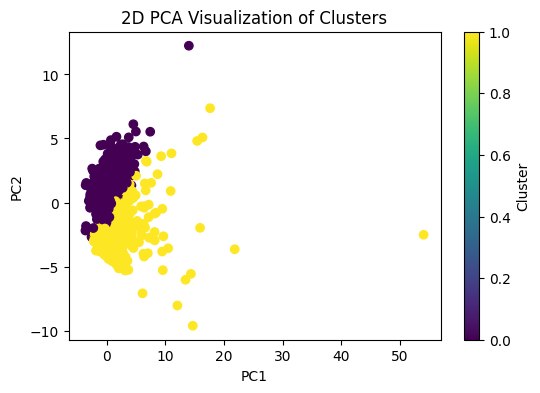

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(6, 4))
plt.scatter(
    reduced_features[:, 0],
    reduced_features[:, 1],
    c=learner_data['Cluster_2'],
    cmap='viridis'
)
plt.title("2D PCA Visualization of Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

labels_2 = learner_data['Cluster_2']
sil_2 = silhouette_score(scaled_features, labels_2)
print("Silhouette Score for k=2:", sil_2)


Silhouette Score for k=2: 0.3692979595252593


Around 0.3–0.5: Moderate clustering quality; there’s some structure, but it’s not super distinct.

It suggests moderate separability

Trying **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Assume 'scaled_features' are the same features you used for K-Means
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune eps, min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_features)

learner_data['DBSCAN_Cluster'] = dbscan_labels
print(learner_data['DBSCAN_Cluster'].value_counts())

# Check how many outliers (label = -1) DBSCAN assigns
outliers = learner_data[learner_data['DBSCAN_Cluster'] == -1]
print(f"Number of outliers: {len(outliers)}")



DBSCAN_Cluster
-1     2174
 1      170
 0      110
 6       36
 3       22
 8        9
 14       7
 13       7
 9        6
 15       6
 4        6
 12       5
 20       5
 7        5
 5        5
 2        5
 18       5
 19       5
 16       5
 17       5
 10       4
 11       4
Name: count, dtype: int64
Number of outliers: 2174


In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
learner_data['DBSCAN_Cluster'] = dbscan_labels
print(learner_data['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
-1     1490
 1      335
 4      277
 2      116
 3       84
 5       79
 6       45
 8       37
 7       25
 10      22
 9       12
 0       11
 17       9
 13       9
 16       8
 14       8
 19       7
 20       6
 21       6
 11       6
 12       6
 18       5
 15       3
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

eps_values = [0.5, 0.7, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 8, 10]

results = []

for eps in eps_values:
    for min_samp in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        labels = dbscan.fit_predict(scaled_features)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_outliers = sum(labels == -1)
        total_points = len(labels)

        results.append({
            'eps': eps,
            'min_samples': min_samp,
            'clusters': n_clusters,
            'outliers': n_outliers,
            'outlier_pct': round(n_outliers / total_points * 100, 2)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by='outliers', inplace=True)
results_df


,eps,min_samples,clusters,outliers,outlier_pct
16,1.5,3,8,223,8.56
17,1.5,5,3,266,10.21
18,1.5,8,2,311,11.93
19,1.5,10,1,327,12.55
12,1.2,3,7,398,15.27
13,1.2,5,5,456,17.50
14,1.2,8,2,525,20.15
15,1.2,10,2,560,21.49
8,1.0,3,15,635,24.37
9,1.0,5,5,735,28.20


In [ ]:
# Profile each DBSCAN cluster by mean, median, and count of each feature
cluster_profile = learner_data.groupby('DBSCAN_Cluster').agg(['mean', 'median', 'count'])

# Display the resulting DataFrame
cluster_profile


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
numeric_cols = [
    'listening_mean_time',
    'listening_total_time',
    'listening_task_count',
    'listening_unique_pos',
    'reverse_tap_mean_time',
    'reverse_tap_total_time',
    'reverse_tap_task_count',
    'reverse_tap_unique_pos',
    'reverse_translate_mean_time',
    'reverse_translate_total_time',
    'reverse_translate_task_count',
    'reverse_translate_unique_pos'
    # add more if you have them
]

cluster_profile = learner_data.groupby('DBSCAN_Cluster')[numeric_cols].agg(['mean','median','count'])
cluster_profile


listening_mean_time                  listening_total_time  \
                              mean     median count                 mean   
DBSCAN_Cluster                                                             
-1                       15.294725  14.165810  1490          6238.940268   
 0                       12.609242  13.121212    11          2140.909091   
 1                       11.621551  11.373391   335          2425.564179   
 2                       11.082812  11.028814   116          2078.258621   
 3                       12.765173  12.408851    84          3873.726190   
 4                       11.832857  11.658863   277          2759.635379   
 5                       12.196002  11.606965    79          2981.835443   
 6                       11.196870  11.289474    45          1704.822222   
 7                       11.293114  11.407801    25          2664.520000   
 8                       10.251599  10.028986    37          2565.135135   
 9                       13.431263  12.854453    12          3774.666667   
 10                      10.694597  10.523938    22          2370.090909   
 11                       9.590665   9.348130     6          1952.666667   
 12                       7.995336   8.070526     6          1640.166667   
 13                       9.448154   9.477690     9          2715.111111   
 14                       6.620924   6.575811     8          1715.375000   
 15                      13.052403  13.225806     3          7235.666667   
 16                      11.873350  11.939374     8          2344.500000   
 17                       9.923933   9.327273     9          5051.333333   
 18                       8.105915   8.141058     5          3092.400000   
 19                      21.215220  21.139896     7          4515.571429   
 20                      11.603576  11.288829     6          2948.166667   
 21                      15.204840  15.174806     6          2880.000000   

                             listening_task_count               \
                median count                 mean median count   
DBSCAN_Cluster                                                   
-1              4648.0  1490           403.390604  318.5  1490   
 0              2262.0    11           169.909091  175.0    11   
 1              2338.0   335           208.277612  200.0   335   
 2              1976.5   116           186.474138  174.5   116   
 3              3630.5    84           303.297619  290.5    84   
 4              2607.0   277           234.480144  218.0   277   
 5              2966.0    79           241.683544  233.0    79   
 6              1622.0    45           152.688889  151.0    45   
 7              2701.0    25           238.000000  244.0    25   
 8              2121.0    37           250.108108  222.0    37   
 9              3862.0    12           282.166667  296.5    12   
 10             2301.0    22           222.590909  224.0    22   
 11             2029.5     6           199.333333  225.0     6   
 12             1478.0     6           205.333333  206.0     6   
 13             3123.0     9           286.111111  280.0     9   
 14             1625.0     8           269.875000  250.5     8   
 15             7228.0     3           555.000000  543.0     3   
 16             2433.0     8           197.875000  198.0     8   
 17             4908.0     9           503.000000  542.0     9   
 18             3232.0     5           385.600000  397.0     5   
 19             4428.0     7           213.571429  208.0     7   
 20             2863.5     6           254.833333  251.0     6   
 21             2878.0     6           188.833333  191.5     6   

               listening_unique_pos  ... reverse_translate_mean_time  \
                               mean  ...                       count   
DBSCAN_Cluster                       ...                               
-1                         9.618121  ...                        1490   
 0                         9.0000

# **Compare Reverse Tap & Reverse Translate**

In [ ]:
import pandas as pd

# Group by the existing DBSCAN clusters
reverse_stats = learner_data.groupby('DBSCAN_Cluster')[
    ['reverse_tap_mean_time', 'reverse_tap_total_time',
     'reverse_translate_mean_time', 'reverse_translate_total_time']
].agg(['mean', 'median', 'count'])

# Display the stats table
reverse_stats


reverse_tap_mean_time                  reverse_tap_total_time  \
                                mean     median count                   mean   
DBSCAN_Cluster                                                                 
-1                          7.091277   6.804332  1490            2132.502685   
 0                          8.382704   7.630597    11            1451.545455   
 1                          6.372644   6.114583   335            1120.707463   
 2                          6.581610   6.550000   116            1251.284483   
 3                          5.217559   5.135065    84             921.916667   
 4                          5.759504   5.638514   277             975.021661   
 5                          6.006179   5.619565    79             966.215190   
 6                          6.383929   6.237288    45             918.577778   
 7                          6.386267   6.421875    25            1331.520000   
 8                          0.000000   0.000000    37               0.000000   
 9                          0.000000   0.000000    12               0.000000   
 10                         6.095250   6.189394    22             439.772727   
 11                         0.000000   0.000000     6               0.000000   
 12                         0.000000   0.000000     6               0.000000   
 13                         0.000000   0.000000     9               0.000000   
 14                         0.000000   0.000000     8               0.000000   
 15                         5.833067   5.926829     3            2495.000000   
 16                         8.167092   8.182584     8            1286.625000   
 17                         0.000000   0.000000     9               0.000000   
 18                         4.841563   4.676190     5             366.000000   
 19                         7.888240   8.119403     7             640.142857   
 20                         7.377410   7.812331     6            2157.166667   
 21                        12.777506  12.584641     6            2678.833333   

                             reverse_translate_mean_time                   \
                median count                        mean     median count   
DBSCAN_Cluster                                                              
-1              1243.5  1490                   19.855710  18.461136  1490   
 0              1436.0    11                   12.719972  12.710526    11   
 1               962.0   335                   15.233859  14.840000   335   
 2              1037.0   116                   14.228106  14.289322   116   
 3               950.0    84                   16.622679  15.968464    84   
 4               866.0   277                   16.211342  15.455696   277   
 5               913.0    79                   15.857375  16.243902    79   
 6               805.0    45                   12.481745  12.106061    45   
 7              1150.0    25                   13.214034  13.180000    25   
 8                 0.0    37                   13.130777  12.626263    37   
 9                 0.0    12                   12.985810  12.515527    12   
 10              408.0    22                   13.842753  14.186794    22   
 11                0.0     6                   11.266675  11.551597     6   
 12                0.0     6                    8.781994   8.662610     6   
 13                0.0     9                   12.338742  12.194245     9   
 14                0.0     8                    9.567690   9.640228     8   
 15             2673.0     3                   16.634528  17.006452     3   
 16             1253.0     8                   12.505031  12.504399     8   
 17                0.0     9                   11.003397  11.072902     9   
 18              394.0     5                   10.474181  10.324397     5   
 19              503.0     7                   19.412379  19.575000     7   
 20             2184.5     6                   14.050292  14.069712     6   
 21      

In [ ]:
import pandas as pd

feature_cols = [
    'listening_mean_time', 'listening_total_time',
    'reverse_tap_mean_time', 'reverse_tap_total_time',
    'reverse_translate_mean_time', 'reverse_translate_total_time'
]

# Compute mean for each cluster
cluster_centroids = learner_data.groupby('DBSCAN_Cluster')[feature_cols].mean()

# Each row is a cluster, and each column is the mean value of that feature
cluster_centroids


,listening_mean_time,listening_total_time,reverse_tap_mean_time,reverse_tap_total_time,reverse_translate_mean_time,reverse_translate_total_time
DBSCAN_Cluster,,,,,,
-1,15.294725,6238.940268,7.091277,2132.502685,19.855710,5406.750336
0,12.609242,2140.909091,8.382704,1451.545455,12.719972,295.818182
1,11.621551,2425.564179,6.372644,1120.707463,15.233859,1618.582090
2,11.082812,2078.258621,6.581610,1251.284483,14.228106,875.491379
3,12.765173,3873.726190,5.217559,921.916667,16.622679,2602.547619
4,11.832857,2759.635379,5.759504,975.021661,16.211342,2703.851986
5,12.196002,2981.835443,6.006179,966.215190,15.857375,1675.367089
6,11.196870,1704.822222,6.383929,918.577778,12.481745,426.155556
7,11.293114,2664.520000,6.386267,1331.520000,13.214034,738.000000


Compute the Euclidean distance between each pair of cluster centroid vectors, to help quantify which clusters are closest in multi-dimensional feature space

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Convert the cluster_centroids DataFrame into a NumPy array
X = cluster_centroids.values  # shape (num_clusters, num_features)

# Compute all pairwise distances
dist_array = pdist(X, metric='euclidean')
dist_matrix = squareform(dist_array)

# Convert to a DataFrame for readability
dist_df = pd.DataFrame(dist_matrix,
                       index=cluster_centroids.index,
                       columns=cluster_centroids.index)

dist_df


DBSCAN_Cluster,-1,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.000000,6586.292550,5469.535702,6214.513230,3863.072531,4555.327800,5088.438470,6843.846591,5934.251750,5486.263258,...,6131.569132,5619.701891,6045.383059,1130.758333,6330.296747,2615.082479,3905.315272,3241.664623,5748.441123,4786.480340
0,6586.292550,0.000000,1392.909899,616.488769,2933.289574,2531.510146,1686.971678,700.871015,695.776700,2230.075376,...,2262.280494,2023.691255,2286.363050,7022.314803,325.156542,6868.156874,3894.955707,3764.700874,1143.556168,2257.807000
1,5469.535702,1392.909899,0.000000,830.576100,1762.068025,1144.831884,580.112895,1407.911280,936.467199,1172.815284,...,1409.811821,1158.056754,1383.421614,6046.417177,1145.198160,5521.846326,2506.088579,2607.707229,1484.297923,1677.102375
2,6214.513230,616.488769,830.576100,0.000000,2512.950583,1970.660578,1239.968125,672.349819,607.490850,1710.236009,...,1711.064392,1572.531637,1727.761399,6728.927725,471.167298,6349.935525,3322.819002,3357.394207,1269.048596,2009.684626
3,3863.072531,2933.289574,1762.068025,2512.950583,0.000000,1119.947491,1287.282693,3072.598079,2259.758278,1734.443762,...,2501.069074,1797.357565,2420.607655,4426.686537,2634.634173,4030.327194,1624.163654,860.838841,2454.990517,2095.201586
4,4555.327800,2531.510146,1144.831884,1970.660578,1119.947491,0.000000,1052.250884,2510.723489,2000.180416,1256.983948,...,1661.782024,1485.772073,1588.186125,5261.659092,2275.476177,4411.505266,1394.522758,1831.445781,2339.772063,1832.254629
5,5088.438470,1686.971678,580.112895,1239.968125,1287.282693,1052.250884,0.000000,1787.057380,1054.894166,1083.769002,...,1677.248247,1006.567750,1627.804388,5619.892002,1384.855640,5198.361987,2319.767482,2120.013174,1543.880657,1754.165700
6,6843.846591,700.871015,1407.911280,672.349819,3072.598079,2510.723489,1787.057380,0.000000,1090.315829,1964.669092,...,1786.623964,1790.068317,1831.207768,7357.295869,740.622248,6861.268190,3793.626770,3890.873399,1775.242098,2662.120597
7,5934.251750,695.776700,936.467199,607.490850,2259.758278,2000.180416,1054.894166,1090.315829,0.000000,1793.085654,...,2075.736960,1578.195817,2071.839210,6367.021316,408.344233,6237.753278,3346.415302,3081.185538,874.145227,1886.585218


In [ ]:
for cluster_label in dist_df.index:
    # Sort distances for this cluster (ascending)
    # The [1] is because [0] will be the distance to itself = 0
    closest_cluster = dist_df.loc[cluster_label].sort_values().index[1]
    closest_dist = dist_df.loc[cluster_label].sort_values().iloc[1]
    print(f"Cluster {cluster_label} is closest to {closest_cluster} with distance {closest_dist:.2f}")


Cluster -1 is closest to 15 with distance 1130.76
Cluster 0 is closest to 16 with distance 325.16
Cluster 1 is closest to 5 with distance 580.11
Cluster 2 is closest to 16 with distance 471.17
Cluster 3 is closest to 19 with distance 860.84
Cluster 4 is closest to 10 with distance 1019.60
Cluster 5 is closest to 1 with distance 580.11
Cluster 6 is closest to 2 with distance 672.35
Cluster 7 is closest to 16 with distance 408.34
Cluster 8 is closest to 13 with distance 381.81
Cluster 9 is closest to 18 with distance 841.37
Cluster 10 is closest to 18 with distance 845.94
Cluster 11 is closest to 14 with distance 558.36
Cluster 12 is closest to 14 with distance 92.07
Cluster 13 is closest to 8 with distance 381.81
Cluster 14 is closest to 12 with distance 92.07
Cluster 15 is closest to -1 with distance 1130.76
Cluster 16 is closest to 0 with distance 325.16
Cluster 17 is closest to -1 with distance 2615.08
Cluster 18 is closest to 9 with distance 841.37
Cluster 19 is closest to 3 with di

Merging Symmetrical Pairs

In [ ]:
merge_map = {
    -1: '-1_15',  # Merge -1 & 15
    15: '-1_15',
    0: '0_16',    # Merge 0 & 16
    16: '0_16',
    1: '1_5',     # Merge 1 & 5
    5: '1_5',
    8: '8_13',    # Merge 8 & 13
    13: '8_13',
    12: '12_14',  # Merge 12 & 14
    14: '12_14'
    # The rest remain the same
}
def merge_sym_pairs(label):
    return merge_map[label] if label in merge_map else label

learner_data['MergedCluster'] = learner_data['DBSCAN_Cluster'].apply(merge_sym_pairs)


In [ ]:
learner_data['MergedCluster'].value_counts()


,count
MergedCluster,
-1_15,1493
1_5,414
4,277
2,116
3,84
8_13,46
6,45
7,25
10,22


Merging ALL Clusters Under a Minimum **Size**

In [ ]:
min_size = 10
small_labels = []
cluster_sizes = learner_data['MergedCluster'].value_counts()

for label, size in cluster_sizes.items():
    if size < min_size:
        small_labels.append(label)

# Step 1: compute centroids of current clusters
current_centroids = learner_data.groupby('MergedCluster')[feature_cols].mean()

# Step 2: compute distance among these centroids
from scipy.spatial.distance import pdist, squareform
import numpy as np

X = current_centroids.values
dist_array = pdist(X, metric='euclidean')
dist_matrix = squareform(dist_array)

dist_df = pd.DataFrame(
    dist_matrix,
    index=current_centroids.index,
    columns=current_centroids.index
)

# Step 3: For each small cluster, find the closest bigger cluster
def find_closest_big_cluster(label):
    distances = dist_df.loc[label].drop(label)  # exclude itself
    # Sort ascending
    sorted_dists = distances.sort_values()
    # Go through each closest candidate until bigger one is found
    for cand_label in sorted_dists.index:
        if cluster_sizes[cand_label] >= min_size:
            return cand_label
    return label  # fallback if no bigger cluster found

# Step 4: Create a mapping
merge_map = {}
for small_label in small_labels:
    # find which bigger cluster is closest
    new_label = find_closest_big_cluster(small_label)
    if new_label != small_label:
        merge_map[small_label] = new_label

merge_map


NameError: name 'learner_data' is not defined